<a href="https://colab.research.google.com/github/Askoye/Titanic-Ship-Survival-Prediction-Project/blob/main/Titanic_Ship_Survival_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Ship Survival Prediction

## Context of the Business Problem

Titanic was a  British luxury passenger liner that sank on April 14th – 15th, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500  passengers and ship personnel. One of the most famous tragedies in modern history and has been the subject of much scholarship and scientific speculation.

## Problem Statement

Using the K-Nearest Neighbours Classifier and given a number of features, predict whether a passenger onboard the Titanic survived the shipwreck.

## Experimental Design

Randomly partition each dataset into two parts i.e 80 - 20  sets because we don't have the label for the test set, we will use the train set to create train and test data 
(i.e. splitting further), then perform K-nearest neighbor classification.


## Metrics of success
We will use the following metics to evalute the performance of our models:
- Accuracy score
- Precission
- F1 score

## Loading the Libraries and Files

In [ ]:
# Loading the necessary libraries

import numpy as np       
import pandas as pd       

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split   
from sklearn.preprocessing import StandardScaler       
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score          
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')                      


In [ ]:
# Loading the Data Files

titanic = pd.read_csv('train.csv')


In [ ]:
# Displaying the first few records of the dataset

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Displaying the last 5 records of the data

titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Analysis

In [ ]:
# Using the describe function to get a general description of the data.

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Some passengers paid as much as 512 Euros to board while there are those that did not pay anything at all. 


### Dealing with columns

In [ ]:
# Checking for the column datatypes

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- The passenger id, survived and pclass columns are set as numeric columns while they represent categorical feature types

In [ ]:
# Checking for the unique values in the dataset using a for loop to iterate through
# the columns and output the number of unique values and the values.

for x in titanic.columns:
  
  print(x, ':' , titanic[x].nunique())
  print(titanic[x].unique(), '\n')

PassengerId : 891
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 

- The passenger Id, name and ticket columns have a very high cardinality (number of unique features). We will have to drop these columns before we feed our data to a model.

In [ ]:
# Renaming the columns

titanic.columns = titanic.columns.str.lower()

titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
# Changing the categorical columns to categorical datatypes.
# Columns = passenger ID, Survived, Pclass, Name, Sex, Ticket, Cabin, Embarked 

columns = ['passengerid', 'survived', 'name', 'sex', 'ticket', 'cabin', 'embarked']

for col in columns:
  titanic[[col]] = titanic[[col]].astype('category')
  
titanic.dtypes

passengerid    category
survived       category
pclass            int64
name           category
sex            category
age             float64
sibsp             int64
parch             int64
ticket         category
fare            float64
cabin          category
embarked       category
dtype: object

- We have successfully changed the columns to categorical datatype.
- in the case of the survived and pclass columns, changing them to represent categories instead of taking numerical values allows our model to capture this information optimally.

### Dealing with Duplicate Values

In [ ]:
# Lets look at the shape of our dataset


print('Our dataset has ', titanic.shape[0], 'rows and ', titanic.shape[1], 'columns')

Our dataset has  891 rows and  12 columns


In [ ]:
# Checking for duplicates in the data using the duplicated() function
# any() functions returns a true or false result to the query of missing values
# instead of printing out the whole dataframe and reporting the presence of duplicates per record

titanic.duplicated(keep = 'first').any()

False

- There are no duplicate records in our data.

### Checking for Missing Values

In [ ]:
# Using a isnull() funstion to check for null values in our data.
# Using a sum() function returns the sum of all missing values per column.

titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

- Cabin has 687, age has 177 and embarked has 2 missing values in the dataset. What could be the cause of this? 

In [ ]:
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

## Visuals Analysis

### Univariate EDA

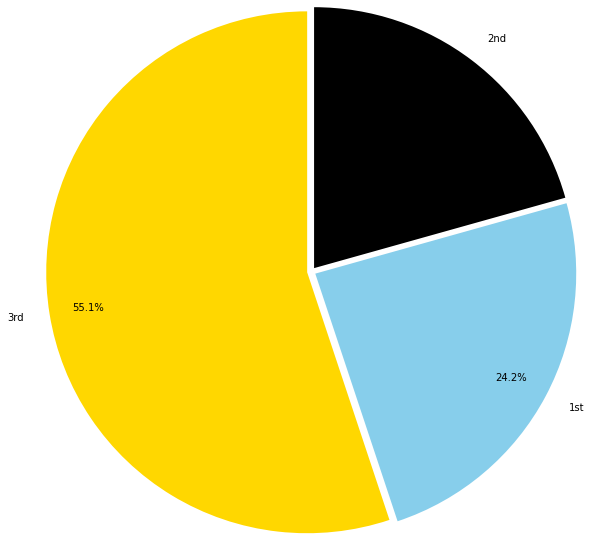

In [ ]:
# Checking the proportion of travellers in for the passenger class aboard

class_pie = titanic['pclass'].value_counts()


#sns.set_style('darkgrid')

labels = ['3rd', '1st', '2nd']
colors = ['gold', 'skyblue', 'black']
explode = [0.05, 0.05, 0.05]

# Creating the pie chart
plt.pie(class_pie,labels = labels, colors=colors, startangle=90, autopct='%1.1f%%', 
        pctdistance=0.85,center = (0.5,0.5),  explode = explode, radius = 3)
plt.show()

- The highest proportion of passengers aboard the titanic purchased 3rd class tickets at 55%, followed by 1st class at 24% and finally 2nd class at 20% of the passengers aboard.


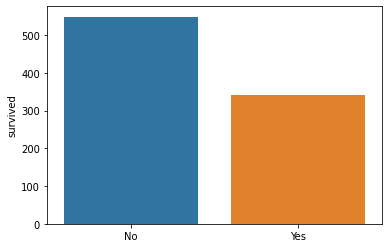

In [ ]:
# Counting the number of passengers that survived the shipwreck vs those who did not survive.
survivors =  titanic['survived'].value_counts()

# Now visualizing this information  in the form of bar plots
labels = ['No', 'Yes']
#colors = ['c', 'alpha']

sns.barplot(x = labels, y = survivors)
plt.show()

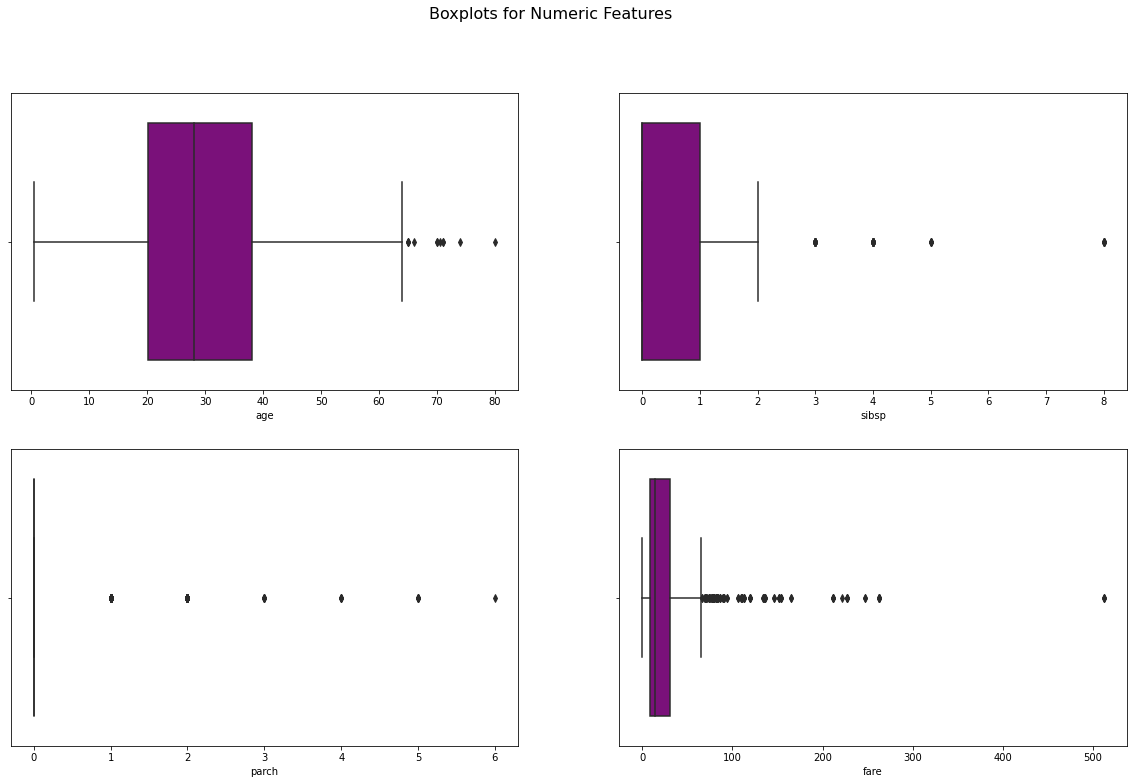

In [ ]:
# Checking for outliers using boxplots

numeric = ['age', 'sibsp', 'parch', 'fare']


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 12))
for ax, data, name in zip(axes.flatten(), titanic, numeric):
  sns.boxplot(titanic[name], color = 'darkmagenta', ax = ax)
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

- The presence of outliers in our dataset informs that we cannot replace/ impute the the missing values in the age column with the mean age as the outliers affenct the mean of a feature.
- From the sibsp and parch columns, we infer that most of the travellers travelled alone or were accompanied by one person.

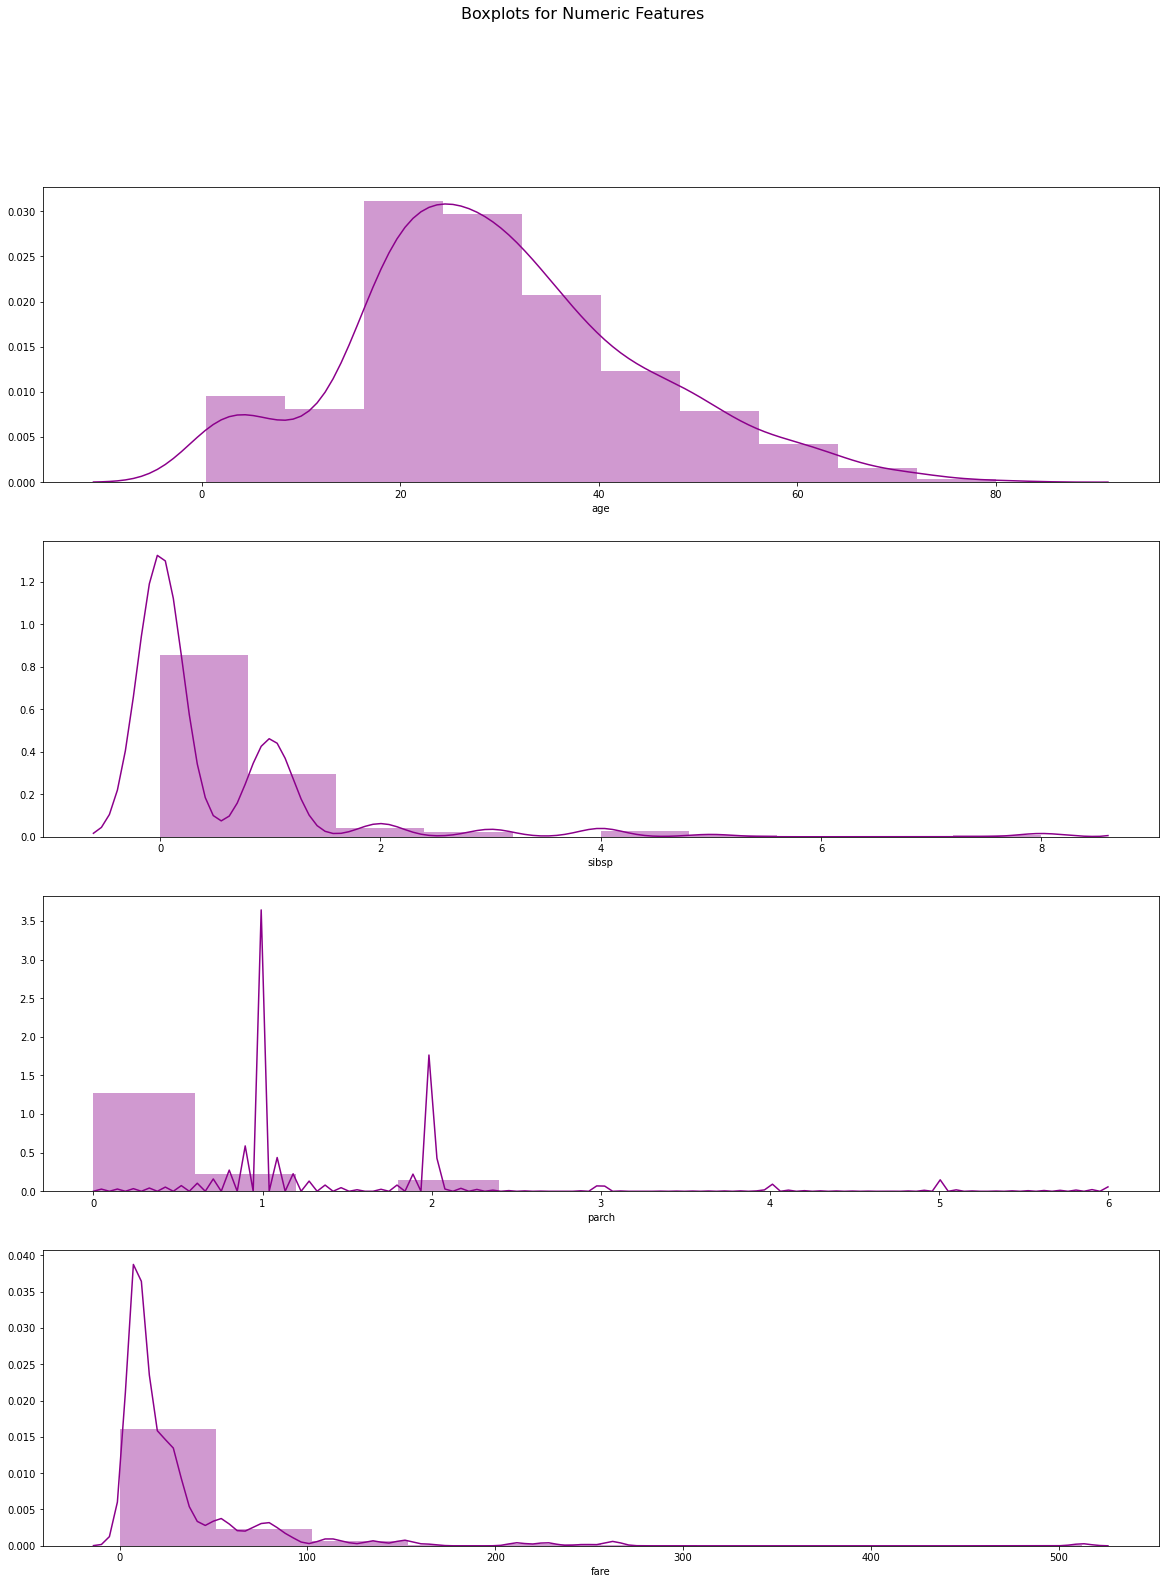

In [ ]:
# Checking the distribution of our data using distribution plots

fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (20, 25))

for ax, name, data in zip(axes.flatten(), numeric, titanic):
  sns.distplot(titanic[name], hist = True, ax = ax, bins = 10, color = 'darkmagenta')
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

## Feature Engineering

**1. Column Creation**

In [ ]:
# Creating a new column show the size of each passengers family 

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic.tail(15)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family_size
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,1
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,2
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,2
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,1
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,1
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,6


 **1. Dropping Unnecessary Columns**

We are going to drop some some  of the columns that we do not need in training our model.

 The following columns will be dropped due to their high cardinality:
 - Names
 - Passenger Id
 - Cabin

Since we have the family size column representing the sibsp and parch columns, we will drop the two columns as well.

In [ ]:
titanic.drop(columns = ['name', 'passengerid', 'cabin', 'ticket', 'sibsp', 'parch', 'age'], axis = 1 , inplace = True)

titanic.head()

,survived,pclass,sex,fare,embarked,family_size
0,0,3,male,7.2500,S,2
1,1,1,female,71.2833,C,2
2,1,3,female,7.9250,S,1
3,1,1,female,53.1000,S,2
4,0,3,male,8.0500,S,1


## Data Cleaning

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
fare           0
embarked       2
family_size    0
dtype: int64

**1. Dealing with Missing Values**
- We fill in the missing values of the age column with the median age due to the presence of outliers in the age column.
 The median is not affected by outliers.
- The embarked column we will fill using the mode.



In [ ]:
#titanic['age'].fillna(titanic['age'].median, inplace = True)

titanic['embarked'].fillna( 'Q' , inplace = True)

In [ ]:
# Now confirming if the null values have been filled

titanic.isnull().sum()

survived       0
pclass         0
sex            0
fare           0
embarked       0
family_size    0
dtype: int64

- Now that all the missing values have been dealt with, we can proceed to the modeling stage.

## Implementing the Solution

In [ ]:
columns = ['sex','embarked']

titanic = pd.get_dummies(titanic, columns=['sex','embarked'])

In [ ]:
titanic.head()

,survived,pclass,fare,family_size,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,7.2500,2,0,1,0,0,1
1,1,1,71.2833,2,1,0,1,0,0
2,1,3,7.9250,1,1,0,0,0,1
3,1,1,53.1000,2,1,0,0,0,1
4,0,3,8.0500,1,0,1,0,0,1


In [ ]:
# Splitting the data into the independent and dependent variables

X = titanic.iloc[:, 1:]
y = titanic.survived

In [ ]:
X.head()

,pclass,fare,family_size,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,7.2500,2,0,1,0,0,1
1,1,71.2833,2,1,0,1,0,0
2,3,7.9250,1,1,0,0,0,1
3,1,53.1000,2,1,0,0,0,1
4,3,8.0500,1,0,1,0,0,1


In [ ]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the outcome

y_pred = clf.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       110
           1       0.74      0.62      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179

[[95 15]
 [26 43]]
The accuracy : 0.770949720670391


In [ ]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the outcome

y_pred = clf.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       168
           1       0.67      0.58      0.62       100

    accuracy                           0.74       268
   macro avg       0.72      0.70      0.71       268
weighted avg       0.73      0.74      0.73       268

[[139  29]
 [ 42  58]]
The accuracy : 0.7350746268656716


In [ ]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the outcome

y_pred = clf.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       221
           1       0.67      0.59      0.63       136

    accuracy                           0.73       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.73      0.73      0.73       357

[[182  39]
 [ 56  80]]
The accuracy : 0.7338935574229691
